In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0-rc2


In [0]:
tf.executing_eagerly()

True

# Using Drive Mounting Instead (Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

To mount Google Drive:
- Run the code below
- Click the URL 
- Sign in & click Allow to get the authorization code
- Copy the authorization code and paste it to:
  Enter your authorization code: 
  ____________

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting, Collab will be connected to your Google Drive
Click the File button on the left <-, click 'drive' then 'My Drive', what we need is:
- sample_labels.csv file and the ct_scan_img.zip
- If it is not there, you can copy it from the Bangkit Group Project Folder
- Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip"

Getting the sample_labels.csv in Colab:
- Find the sample_labels.csv file in your drive folder, right-click, and click COPY PATH
- Change the path variable below with the path you copied

In [0]:
path = "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/sample_labels.csv"
sample_labels = pd.read_csv(path)

In [0]:
sample_labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


Getting the CT Scan Images to Colab:
- Find the ct_scan_img.zip file in your drive folder (in Colab)
- Right-click, then click COPY PATH
- Paste the change the path I have, which is: "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip" BELOW, with the one you have.
- And then run the !unzip to unzip the images

In [0]:
!unzip -uq "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip"

From the Sample Labels dataframe / table, we get the labels for each image, and make a list called 'labels'. Since we only use the first 100 images, we only take the first 100 labels.

In [0]:
labels = sample_labels['Finding Labels'][:100].tolist()

From the Sample Labels dataframe / table, we get the filename of the images, and make a list out of that called 'image_dir' list.

In [0]:
image_dir = sample_labels['Image Index'].tolist()

In [0]:
# Just checking, carry on~
sample_labels[sample_labels['Image Index'] == image_dir[0]]['Finding Labels']

0    Emphysema|Infiltration|Pleural_Thickening|Pneu...
Name: Finding Labels, dtype: object

In [0]:
type(image_dir[0])

str

In [0]:
image_dir[:5]

['00000013_005.png',
 '00000013_026.png',
 '00000017_001.png',
 '00000030_001.png',
 '00000032_001.png']

The RAM available in Google Colab is LIMITED, I believe initially it gives 15 GB.
If there is an error of: Colab doesn't have enough RAM, usually it asks if we want MORE RAM, click yes!
And it will give us 35 GB.

But, it still won't be enough for us to try with ALL of the images.
Therefore, we will only use 100 Images.

In [0]:
test_dir = image_dir[:100] # Taking the first 100 Images

In [0]:
test_dir[:5]

['00000013_005.png',
 '00000013_026.png',
 '00000017_001.png',
 '00000030_001.png',
 '00000032_001.png']

Creating the Datasets:
The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

Sources can be from:
- LIST, using -> from_tensor_slices
- Files given filename, using -> list_files

In [0]:
dataset_from_list = tf.data.Dataset.list_files(test_dir)

In [0]:
dataset_from_list

<ShuffleDataset shapes: (), types: tf.string>

In [0]:
for element in dataset_from_list:
  print(element)

tf.Tensor(b'./00000334_005.png', shape=(), dtype=string)
tf.Tensor(b'./00000061_002.png', shape=(), dtype=string)
tf.Tensor(b'./00000508_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000232_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000318_004.png', shape=(), dtype=string)
tf.Tensor(b'./00000422_003.png', shape=(), dtype=string)
tf.Tensor(b'./00000188_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000490_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000459_004.png', shape=(), dtype=string)
tf.Tensor(b'./00000030_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000521_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000278_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000181_017.png', shape=(), dtype=string)
tf.Tensor(b'./00000450_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000359_002.png', shape=(), dtype=string)
tf.Tensor(b'./00000276_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000099_006.png', shape=(), dtype=string)
tf.Tensor(b'./00000103_001.png'

In [0]:
dataset_of_filenames = tf.data.Dataset.from_tensor_slices(test_dir) 

In [0]:
dataset_of_filenames

<TensorSliceDataset shapes: (), types: tf.string>

In [0]:
for element in dataset_of_filenames:
  print(element)

tf.Tensor(b'00000013_005.png', shape=(), dtype=string)
tf.Tensor(b'00000013_026.png', shape=(), dtype=string)
tf.Tensor(b'00000017_001.png', shape=(), dtype=string)
tf.Tensor(b'00000030_001.png', shape=(), dtype=string)
tf.Tensor(b'00000032_001.png', shape=(), dtype=string)
tf.Tensor(b'00000040_003.png', shape=(), dtype=string)
tf.Tensor(b'00000042_002.png', shape=(), dtype=string)
tf.Tensor(b'00000057_001.png', shape=(), dtype=string)
tf.Tensor(b'00000061_002.png', shape=(), dtype=string)
tf.Tensor(b'00000061_019.png', shape=(), dtype=string)
tf.Tensor(b'00000061_025.png', shape=(), dtype=string)
tf.Tensor(b'00000079_000.png', shape=(), dtype=string)
tf.Tensor(b'00000080_005.png', shape=(), dtype=string)
tf.Tensor(b'00000083_000.png', shape=(), dtype=string)
tf.Tensor(b'00000084_000.png', shape=(), dtype=string)
tf.Tensor(b'00000096_006.png', shape=(), dtype=string)
tf.Tensor(b'00000099_003.png', shape=(), dtype=string)
tf.Tensor(b'00000099_006.png', shape=(), dtype=string)
tf.Tensor(

As we can see, whether it is made using list_files or from_tensor_slices it outputs the same dataset. 

In [0]:
for f in dataset_of_filenames.take(1):
    print(f.numpy())
    print(f)
    print(type(f))
    filename_str = str(f.numpy())[2:-1]
    print(filename_str)
    print(type(filename_str))
    print(type(str(f.numpy())))
    print(image_dir[0])
    print(filename_str == image_dir[0])
    print(sample_labels[sample_labels['Image Index'] == filename_str].reset_index().iloc[0]['Finding Labels'])


b'00000013_005.png'
tf.Tensor(b'00000013_005.png', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
00000013_005.png
<class 'str'>
<class 'str'>
00000013_005.png
True
Emphysema|Infiltration|Pleural_Thickening|Pneumothorax


In [0]:
def parse_data_without_augmentation(filename, IMAGE_SIZE): #, scores, IMAGE_SIZE):
    '''
    Loads the image file without any augmentation. Used for validation set.
    Args:
        filename: the filename from the record
        scores: the scores from the record
    Returns:
        an image referred to by the filename and its scores
    '''

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = (tf.cast(image, tf.float32) - 127.5) / 127.5

    return image #, label #, scores
    
""""
    print("FILENAME")
  
    print(str(filename))
    print(tf.strings.as_string(filename))
    tf.compat.v1.enable_eager_execution()
    filename_str = str(filename.numpy())[2:-1]
    # sample_labels['Finding Labels'].tolist()
    label = sample_labels[sample_labels['Image Index'] == filename_str].reset_index().iloc[0]['Finding Labels']
    #sample_labels[sample_labels['Image Index'] == str(filename)]['Finding Labels']
    print(label)

"""""


'"\n    print("FILENAME")\n  \n    print(str(filename))\n    print(tf.strings.as_string(filename))\n    tf.compat.v1.enable_eager_execution()\n    filename_str = str(filename.numpy())[2:-1]\n    # sample_labels[\'Finding Labels\'].tolist()\n    label = sample_labels[sample_labels[\'Image Index\'] == filename_str].reset_index().iloc[0][\'Finding Labels\']\n    #sample_labels[sample_labels[\'Image Index\'] == str(filename)][\'Finding Labels\']\n    print(label)\n\n'

In [0]:
IMG_WIDTH = 160
IMG_HEIGHT = 160
IMG_SIZE = 160
IMAGE_SIZE = 160
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 25 #1 #####32
print("BATCH SIZE: "+str(BATCH_SIZE))
IMG_HEIGHT = 160 #224
IMG_WIDTH = 160 #224
IMG_SIZE = 160
image_count = len(test_dir)
print(image_count)
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
AUTOTUNE = tf.data.experimental.AUTOTUNE

BATCH SIZE: 25
100


To actually get the Image, we need to parse every bit of the image from the image file, using the function:
parse_data_without_augmentation on the Dataset of filename we have -> list_ds.

num_parallel_calls: (Optional.) If specified, the implementation creates a threadpool, which is used to fetch inputs from cycle elements asynchronously and in parallel. The default behavior is to fetch inputs from cycle elements synchronously with no parallelism. If the value tf.data.experimental.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.

In [0]:
image_dataset = dataset_of_filenames.map(lambda x: parse_data_without_augmentation(x, IMAGE_SIZE), num_parallel_calls=AUTOTUNE)

In [0]:
image_dataset

<ParallelMapDataset shapes: (160, 160, 3), types: tf.float32>

Some things we can do to Dataset object:
- Apply transformation
- Concatenate
- Enumerate (Create tuples of (index, element) with specified index starting point)
- Filter


Since we cannot index a TF Dataset object, we can turn the Dataset into List form using the code below

In [0]:
img_ds_list = list(image_dataset.as_numpy_iterator())

In [0]:
img_ds_list[0]

array([[[-0.3459608 , -0.3459608 , -0.3459608 ],
        [-0.35529408, -0.35529408, -0.35529408],
        [-0.3635294 , -0.3635294 , -0.3635294 ],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       [[ 0.2970197 ,  0.2970197 ,  0.2970197 ],
        [ 0.29427442,  0.29427442,  0.29427442],
        [ 0.29568624,  0.29568624,  0.29568624],
        ...,
        [-0.9650981 , -0.9650981 , -0.9650981 ],
        [-0.9671374 , -0.9671374 , -0.9671374 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       [[ 0.36549026,  0.36549026,  0.36549026],
        [ 0.35803917,  0.35803917,  0.35803917],
        [ 0.35686275,  0.35686275,  0.35686275],
        ...,
        [-0.96862745, -0.96862745, -0.96862745],
        [-0.96509796, -0.96509796, -0.96509796],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       ...,

       [[-0.01607846, -0.01607846, -0.01607846],
        [ 0

In [0]:
# The Images
for image in image_dataset:
  print(image)

Streaming output truncated to the last 5000 lines.
[[[-0.3459608  -0.3459608  -0.3459608 ]
  [-0.35529408 -0.35529408 -0.35529408]
  [-0.3635294  -0.3635294  -0.3635294 ]
  ...
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.2970197   0.2970197   0.2970197 ]
  [ 0.29427442  0.29427442  0.29427442]
  [ 0.29568624  0.29568624  0.29568624]
  ...
  [-0.9650981  -0.9650981  -0.9650981 ]
  [-0.9671374  -0.9671374  -0.9671374 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.36549026  0.36549026  0.36549026]
  [ 0.35803917  0.35803917  0.35803917]
  [ 0.35686275  0.35686275  0.35686275]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96509796 -0.96509796 -0.96509796]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 ...

 [[-0.01607846 -0.01607846 -0.01607846]
  [ 0.1392157   0.1392157   0.1392157 ]
  [ 0.30392158  0.30392158  0.30392158]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.95490146 -0.95490146 -0.954

Splitting Dataset into Training, Testing & Validation 

In [0]:
# Note that we only have 100 images
train_size = 70
test_size = 15
val_size = 15

In [0]:
# Splitting Image Data
train_img = image_dataset.take(train_size)
test_img = image_dataset.skip(train_size)
val_img = test_img.skip(val_size)
test_img = test_img.take(test_size)

In [0]:
train_lab = labels[0:train_size]
print(len(train_lab))
test_lab = labels[train_size:(train_size+test_size)]
print(len(test_lab))
val_lab = labels[(train_size+test_size):]
print(len(val_lab))

70
15
15


In [0]:
for img in train_img:
  print(img)

tf.Tensor(
[[[-0.3459608  -0.3459608  -0.3459608 ]
  [-0.35529408 -0.35529408 -0.35529408]
  [-0.3635294  -0.3635294  -0.3635294 ]
  ...
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.2970197   0.2970197   0.2970197 ]
  [ 0.29427442  0.29427442  0.29427442]
  [ 0.29568624  0.29568624  0.29568624]
  ...
  [-0.9650981  -0.9650981  -0.9650981 ]
  [-0.9671374  -0.9671374  -0.9671374 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.36549026  0.36549026  0.36549026]
  [ 0.35803917  0.35803917  0.35803917]
  [ 0.35686275  0.35686275  0.35686275]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96509796 -0.96509796 -0.96509796]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 ...

 [[-0.01607846 -0.01607846 -0.01607846]
  [ 0.1392157   0.1392157   0.1392157 ]
  [ 0.30392158  0.30392158  0.30392158]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.95490146 -0.95490146 -0.95490146]
  [-0.71333176 -0.71333176 -0.713

In [0]:
def show_batch(image_batch, num_elements): #, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(num_elements):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  #ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  #ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [0]:
BATCH_SIZE = train_size
print("Train size: "+str(BATCH_SIZE))
train_img_batch = prepare_for_training(train_img)
BATCH_SIZE = test_size
print("Test size: "+str(BATCH_SIZE))
test_img_batch = prepare_for_training(test_img)
BATCH_SIZE = val_size
print("Val size: "+str(BATCH_SIZE))
val_img_batch = prepare_for_training(val_img)

Train size: 70
Test size: 15
Val size: 15


In [0]:
#for img in train_img:
#  print(img)

In [0]:
#for img in train_img_batch:
#  print(img)

In [0]:
train_img_batch

<PrefetchDataset shapes: (None, 160, 160, 3), types: tf.float32>

In [0]:
train_batch = next(iter(train_img_batch))
test_batch = next(iter(test_img_batch))
val_batch = next(iter(val_img_batch))

In [0]:
print(train_batch.shape)
print(test_batch.shape)
print(val_batch.shape)

(70, 160, 160, 3)
(15, 160, 160, 3)
(15, 160, 160, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

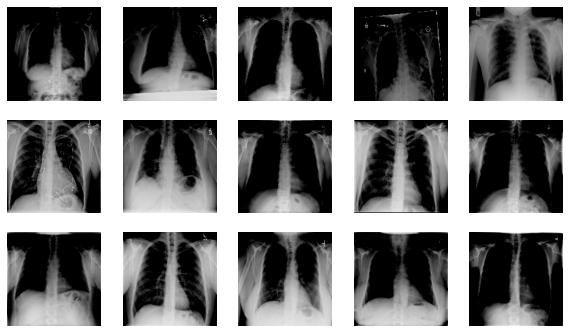

In [0]:
show_batch(val_batch.numpy(), val_size)

{ ABOUT BATCHED_DS will be deleted } We can separate the images in the image dataset to several batches using the: prepare_for_training function

In [0]:
batched_ds = prepare_for_training(labeled_ds)

In [0]:
print(type(batched_ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [0]:
for batch in batched_ds:
  print(batch)

tf.Tensor(
[[[[-0.3459608  -0.3459608  -0.3459608 ]
   [-0.35529408 -0.35529408 -0.35529408]
   [-0.3635294  -0.3635294  -0.3635294 ]
   ...
   [-0.9607843  -0.9607843  -0.9607843 ]
   [-0.9607843  -0.9607843  -0.9607843 ]
   [-0.9607843  -0.9607843  -0.9607843 ]]

  [[ 0.2970197   0.2970197   0.2970197 ]
   [ 0.29427442  0.29427442  0.29427442]
   [ 0.29568624  0.29568624  0.29568624]
   ...
   [-0.9650981  -0.9650981  -0.9650981 ]
   [-0.9671374  -0.9671374  -0.9671374 ]
   [-0.9607843  -0.9607843  -0.9607843 ]]

  [[ 0.36549026  0.36549026  0.36549026]
   [ 0.35803917  0.35803917  0.35803917]
   [ 0.35686275  0.35686275  0.35686275]
   ...
   [-0.96862745 -0.96862745 -0.96862745]
   [-0.96509796 -0.96509796 -0.96509796]
   [-0.9607843  -0.9607843  -0.9607843 ]]

  ...

  [[-0.01607846 -0.01607846 -0.01607846]
   [ 0.1392157   0.1392157   0.1392157 ]
   [ 0.30392158  0.30392158  0.30392158]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.95490146 -0.95490146 -0.95490146]
   [-

Working with Batches

In [0]:
batched_ds

<PrefetchDataset shapes: (None, 160, 160, 3), types: tf.float32>

In [0]:
image_batch = next(iter(batched_ds))

In [0]:
image_batch

<tf.Tensor: shape=(25, 160, 160, 3), dtype=float32, numpy=
array([[[[-0.3459608 , -0.3459608 , -0.3459608 ],
         [-0.35529408, -0.35529408, -0.35529408],
         [-0.3635294 , -0.3635294 , -0.3635294 ],
         ...,
         [-0.9607843 , -0.9607843 , -0.9607843 ],
         [-0.9607843 , -0.9607843 , -0.9607843 ],
         [-0.9607843 , -0.9607843 , -0.9607843 ]],

        [[ 0.2970197 ,  0.2970197 ,  0.2970197 ],
         [ 0.29427442,  0.29427442,  0.29427442],
         [ 0.29568624,  0.29568624,  0.29568624],
         ...,
         [-0.9650981 , -0.9650981 , -0.9650981 ],
         [-0.9671374 , -0.9671374 , -0.9671374 ],
         [-0.9607843 , -0.9607843 , -0.9607843 ]],

        [[ 0.36549026,  0.36549026,  0.36549026],
         [ 0.35803917,  0.35803917,  0.35803917],
         [ 0.35686275,  0.35686275,  0.35686275],
         ...,
         [-0.96862745, -0.96862745, -0.96862745],
         [-0.96509796, -0.96509796, -0.96509796],
         [-0.9607843 , -0.9607843 , -0.960784

In [0]:
image_batch[1].shape

TensorShape([160, 160, 3])

In [0]:
image_batch[1]

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.96588236, -0.96588236, -0.96588236],
        ...,
        [-0.84      , -0.84      , -0.84      ],
        [-0.75137293, -0.75137293, -0.75137293],
        [-0.93498003, -0.93498003, -0.93498003]],

       [[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        ...,
        [-0.78313726, -0.78313726, -0.78313726],
        [-0.85325474, -0.85325474, -0.85325474],
        [-0.9176469 , -0.9176469 , -0.9176469 ]],

       [[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9529412 , -0.9529412 , -0.9529412 ],
        [-0.95490193, -0.95490193, -0.95490193],
        ...,
        [-0.6882353 , -0.6882353 , -0.6882353 ],
        [-0.8329418 , -0.8329418 , -0.8329418 ],
        [-0.8756862 , -0.8756862 , -0.8756862 ]],

       ...,

     

Each batch will have 25 images since our BATCH_SIZE = 25
The image size is 160 x 160, with 3 dimensions

In [0]:
print(len(image_batch))
print(image_batch.shape)

25
(25, 160, 160, 3)


In [0]:
print(len(image_batch[1]))
print(image_batch[1].shape)

160
(160, 160, 3)


In [0]:
image_batch[1]

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.96588236, -0.96588236, -0.96588236],
        ...,
        [-0.84      , -0.84      , -0.84      ],
        [-0.75137293, -0.75137293, -0.75137293],
        [-0.93498003, -0.93498003, -0.93498003]],

       [[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        ...,
        [-0.78313726, -0.78313726, -0.78313726],
        [-0.85325474, -0.85325474, -0.85325474],
        [-0.9176469 , -0.9176469 , -0.9176469 ]],

       [[-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9529412 , -0.9529412 , -0.9529412 ],
        [-0.95490193, -0.95490193, -0.95490193],
        ...,
        [-0.6882353 , -0.6882353 , -0.6882353 ],
        [-0.8329418 , -0.8329418 , -0.8329418 ],
        [-0.8756862 , -0.8756862 , -0.8756862 ]],

       ...,

     

In [0]:
type(image_batch[0])

tensorflow.python.framework.ops.EagerTensor

TypeError: ignored

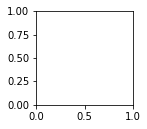

In [0]:
show_batch(train_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

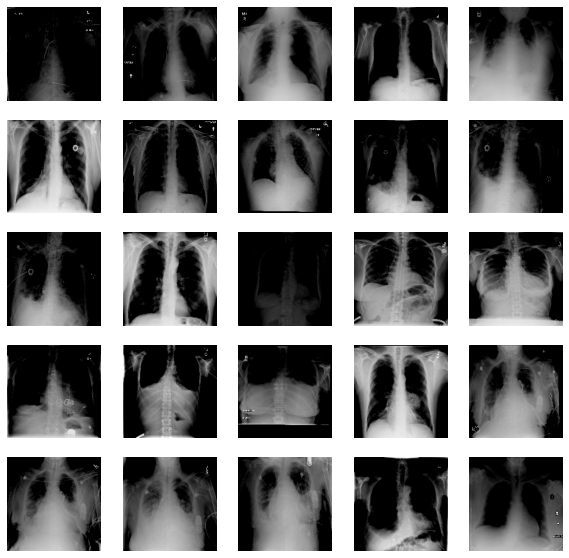

In [0]:
show_batch(image_batch.numpy())

## Feature Extraction Using Pre-trained MobileNetV2 Model

Often, it is better to get features using a pre-trained embedding model that have been trained with millions of images, instead of training our own embedding. We will use MobileNetV2.

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [0]:
print(IMG_SIZE)

160


In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Extracting features for train, test, and validation.

In [0]:
train_features = base_model(train_batch)
test_features = base_model(test_batch)
val_features = base_model(val_batch)

In [0]:
train_features.shape

TensorShape([70, 5, 5, 1280])

We need to convert the numpy version of these features, to Input Tensors, before inputting it to the model.

In [0]:
# fnp = features numpy
train_fnp = train_features.numpy()
test_fnp = test_features.numpy()
val_fnp = val_features.numpy()

In [0]:
train_input = tf.convert_to_tensor(train_fnp, dtype=tf.float32)
test_input = tf.convert_to_tensor(test_fnp, dtype=tf.float32)
val_input = tf.convert_to_tensor(val_fnp, dtype=tf.float32)

In [0]:
test_input.shape

TensorShape([15, 5, 5, 1280])

Another Way:

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
train_batch_ave = global_average_layer(train_features)
print(train_batch_ave.shape)

(70, 1280)


In [0]:
test_batch_ave = global_average_layer(test_features)
print(test_batch_ave.shape)

(15, 1280)


In [0]:
val_batch_ave = global_average_layer(val_features)
print(val_batch_ave.shape)

(15, 1280)


In [0]:
train_pred_layer = tf.keras.layers.Dense(256) #(2) #256

In [0]:
train_pred_batch = prediction_layer(train_batch_ave)
print(train_pred_batch.shape)

(70, 256)


In [0]:
test_pred_batch = prediction_layer(test_batch_ave)
print(test_pred_batchred_batch.shape)

In [0]:
val_pred_batch = prediction_layer(val_batch_ave)
print(val_pred_batch.shape)

(15, 256)


In [0]:
train_input = train_pred_batch.numpy()

In [0]:
train_input.shape

(70, 256)

In [0]:
feature_batch = base_model(image_batch) #(labeled_ds_3)

In [0]:
feature_train = base_model(train_img)

ValueError: ignored

In [0]:
feature_batch.shape

TensorShape([25, 5, 5, 1280])

In [0]:
type(feature_batch)

tensorflow.python.framework.ops.EagerTensor

In [0]:
len(feature_batch)

25

In [0]:
len(feature_batch[0])

5

In [0]:
feature_batch[0]

<tf.Tensor: shape=(5, 5, 1280), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         4.598443  , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         5.562531  , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         3.6604507 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         5.6774187 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         3.6144514 , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         3.0936728 , 0.22757478],
        [0.        , 0.        , 0.        , ..., 0.        ,
         2.9266407 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         4.0893483 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         2.8923428 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.9844757

In [0]:
x = tf.constant([1., 2.])
print(type(x))            # <type 'EagerTensor'>
print(type(x.numpy()))    # <type 'numpy.ndarray'>
print(type(np.array(x)))  # <type 'numpy.ndarray'>

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
fb_np = feature_batch.numpy()

In [0]:
fb_np

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          4.598443  , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          5.562531  , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          3.6604507 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          5.6774187 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          3.6144514 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          3.0936728 , 0.22757478],
         [0.        , 0.        , 0.        , ..., 0.        ,
          2.9266407 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          4.0893483 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          2.8923428 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.9844757 , 0.        ]],

        [[0.    

In [0]:
input_tensors = tf.convert_to_tensor(fb_np, dtype=tf.float32)
#(feature_batch, dtype=tf.float32)

In [0]:
input_tensors.shape

TensorShape([25, 5, 5, 1280])

In [0]:
### Processing the Labels

In [0]:
num_of_labels = len(labels)
print(num_of_labels)

100


In [0]:
unique_labels = sample_labels['Finding Labels'][:100].unique().tolist()
num_of_unique = len(unique_labels)
num_of_unique

26

In [0]:
labels[:5]

['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
 'Cardiomegaly|Emphysema',
 'No Finding',
 'Atelectasis',
 'Cardiomegaly|Edema|Effusion']

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()

In [0]:
le.fit(labels)

LabelEncoder()

In [0]:
labels_val = le.transform(train_lab)

In [0]:
labels_one_hot = tf.one_hot(labels_val, num_of_unique, on_value=1, off_value=0)

In [0]:
labels_one_hot

<tf.Tensor: shape=(70, 26), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)>

In [0]:
#x_image = keras.Input(shape=(32, 5, 5, 1280))

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
y_label = labels_one_hot
#keras.layers.Dense(num_of_labels, activation='softmax')(x_image)

In [0]:
def recall_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

In [0]:
""""
model = keras.Sequential([
    keras.Input(shape=(25, 256)), 
    #(25, 5, 5, 1280)),
    #keras.layers.Flatten(input_shape=(5, 5)),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(10)
    keras.layers.Dense(num_of_unique, activation='softmax')
])
"""""

'"\nmodel = keras.Sequential([\n    keras.Input(shape=(25, 256)), \n    #(25, 5, 5, 1280)),\n    #keras.layers.Flatten(input_shape=(5, 5)),\n    keras.layers.Dense(128, activation=\'relu\'),\n    #keras.layers.Dense(10)\n    keras.layers.Dense(num_of_unique, activation=\'softmax\')\n])\n'

In [0]:
#model.summary()

In [0]:
model_1 = keras.Sequential([
    keras.Input(shape=(256)), 
    #(25, 5, 5, 1280)),
    #keras.layers.Flatten(input_shape=(5, 5)),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(10)
    keras.layers.Dense(num_of_unique, activation='softmax')
])

In [0]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 26)                3354      
Total params: 36,250
Trainable params: 36,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision_m, recall_m, f1_m])
#model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'])

In [0]:
model_1.fit(train_input, y_label, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 18ms/step - loss: 3.6958 - accuracy: 0.0143 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.2159 - accuracy: 0.4143 - precision_m: 0.3333 - recall_m: 0.1111 - f1_m: 0.1667        
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 2.2919 - accuracy: 0.4429 - precision_m: 0.5947 - recall_m: 0.4479 - f1_m: 0.5073
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.2867 - accuracy: 0.4571 - precision_m: 0.4621 - recall_m: 0.3681 - f1_m: 0.4047
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 1.4770 - accuracy: 0.4571 - precision_m: 0.6848 - recall_m: 0.5382 - f1_m: 0.6019
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 1.6060 - accuracy: 0.5286 - precision_m: 0.7430 - recall_m: 0.4583 - f1_m: 0.5655
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - los

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision_m, recall_m, f1_m])
#model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'])

In [0]:
#x_image 
input_tensors.shape

TensorShape([25, 5, 5, 1280])

In [0]:
y_label.shape

TensorShape([25, 13])

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(25, 1280)


In [0]:
prediction_layer = tf.keras.layers.Dense(256) #(2) #256
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(25, 256)


In [0]:
x_input = prediction_batch.numpy()

In [0]:
x_input.shape

(25, 256)

In [0]:
x_input

array([[ 1.1733351 , -0.6696074 , -0.14256012, ..., -1.2103803 ,
         3.0882092 ,  0.08387232],
       [ 0.00649732,  0.8282046 ,  0.35234463, ..., -0.63565034,
         1.3158541 ,  0.20736408],
       [ 0.1903578 ,  0.5411837 ,  0.17111409, ..., -1.2161798 ,
         1.2432648 ,  0.7155169 ],
       ...,
       [ 0.711139  ,  0.36192763,  0.7802846 , ..., -0.33890593,
         1.1285355 ,  0.245237  ],
       [-0.36078444, -1.0919836 ,  0.8536021 , ...,  0.8325725 ,
         2.4118648 , -0.519742  ],
       [-0.57571465, -0.65150845,  1.0797919 , ..., -0.4737853 ,
         1.5595077 , -0.11478322]], dtype=float32)

In [0]:
y_label

<tf.Tensor: shape=(25, 13), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
model.fit(x_input, y_label, epochs=10)
#model.fit(input_tensors, y_label, epochs=2)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9427 - accuracy: 0.8400 - precision_m: 0.9167 - recall_m: 0.4400 - f1_m: 0.5946
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.8279 - accuracy: 0.9200 - precision_m: 1.0000 - recall_m: 0.5200 - f1_m: 0.6842
Epoch 3/10
1/1 [==============================] - 0s 959us/step - loss: 0.7238 - accuracy: 0.9200 - precision_m: 1.0000 - recall_m: 0.6000 - f1_m: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.9600 - precision_m: 1.0000 - recall_m: 0.6800 - f1_m: 0.8095
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.9600 - precision_m: 1.0000 - recall_m: 0.8000 - f1_m: 0.8889
Epoch 6/10
1/1 [==============================] - 0s 965us/step - loss: 0.4762 - accuracy: 0.9600 - precision_m: 1.0000 - recall_m: 0.8400 - f1_m: 0.9130
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4143 - accur

In [0]:
model_1.fit(x_input, y_label, epochs=10)
#model.fit(input_tensors, y_label, epochs=2)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7461 - accuracy: 0.9600 - precision_m: 1.0000 - recall_m: 0.5200 - f1_m: 0.6842
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 1.0000 - precision_m: 1.0000 - recall_m: 0.5600 - f1_m: 0.7179
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 1.0000 - precision_m: 1.0000 - recall_m: 0.6000 - f1_m: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 1.0000 - precision_m: 1.0000 - recall_m: 0.8400 - f1_m: 0.9130
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 1.0000 - precision_m: 1.0000 - recall_m: 0.9600 - f1_m: 0.9796
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 1.0000 - precision_m: 1.0000 - recall_m: 0.9600 - f1_m: 0.9796
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: